# Hand Digit character recognization - MNIST Dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# importing the dataset from keras 
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

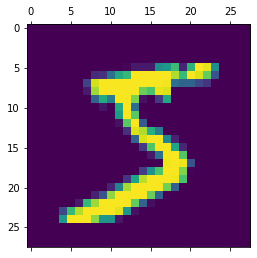

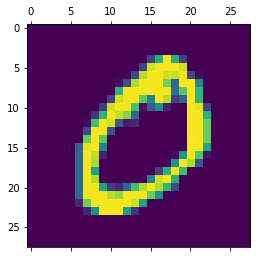

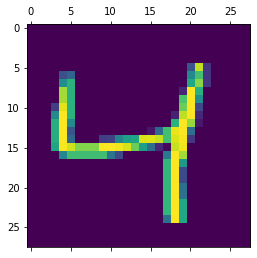

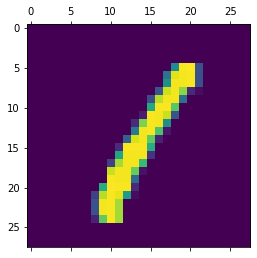

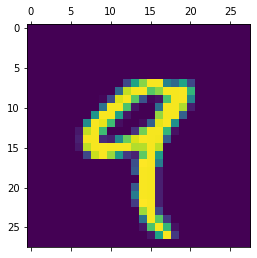

In [7]:
#Displaying first 5 handwritten digits of the training dataset
for x in range(5):
    plt.matshow(X_train[x])
    
 #these are 28x28 size images containing 784 pixels   

In [8]:
# Displaying the target variable
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
# Scaling the datasets 
X_train = X_train / 255
X_test = X_test / 255

In [11]:
#flattening
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
#flattening
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

Since the size of each image is 28x28 pixels ie 784 which means that 784 neurons will be present 

In [13]:
# Building a neural network
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) , activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(X_train_flattened, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7323 - accuracy: 0.8063
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3144 - accuracy: 0.9115
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9219
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9272


Scaling improves the model performance

In [14]:
# testing the model performance
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2646 - accuracy: 0.9267


[0.2645907700061798, 0.9266999959945679]

In [15]:
# predicting on the test dataset

y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.46609151e-02, 5.41340512e-07, 9.31983590e-02, 9.48266149e-01,
       2.54881382e-03, 1.05587155e-01, 1.62179049e-06, 9.99790549e-01,
       1.10955596e-01, 6.49308264e-01], dtype=float32)

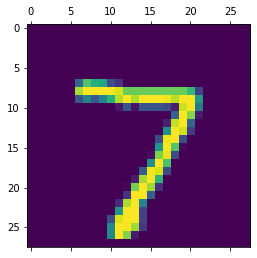

In [16]:
#Just checking how our model performs
plt.matshow(X_test[0])

In [17]:
#finding the index of the maximum value
np.argmax(y_predicted[0])

7

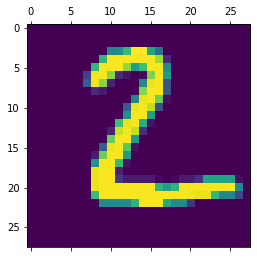

In [18]:
plt.matshow(X_test[1])

In [19]:
#finding the index of the maximum value
np.argmax(y_predicted[1])

2

In [20]:
y_predicted = [np.argmax(i) for i in y_predicted] 
y_predicted[:5]

[7, 2, 1, 0, 4]

In [21]:
cm =tf.math.confusion_matrix(labels=y_test , predictions= y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  934,   12,    8,    3,   11,   10,   37,    3],
       [   4,    0,   22,  910,    0,   29,    2,   11,   24,    8],
       [   1,    1,    6,    0,  909,    0,   10,    4,   10,   41],
       [  10,    3,    4,   25,    7,  786,   12,    5,   34,    6],
       [  14,    3,    9,    1,    7,   13,  906,    2,    3,    0],
       [   1,    7,   24,    4,    8,    1,    0,  945,    2,   36],
       [   7,    7,    7,   16,    9,   24,    8,   10,  878,    8],
       [  10,    7,    2,    8,   23,    6,    0,   21,    9,  923]])>

Text(87.0, 0.5, 'truth')

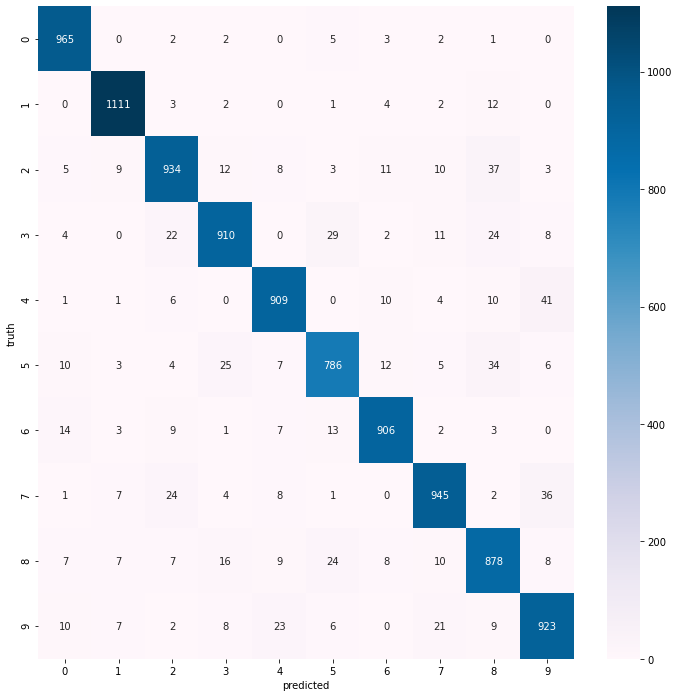

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(cm , annot= True ,fmt= 'd' ,cmap='PuBu')
plt.xlabel('predicted')
plt.ylabel('truth')

In [23]:
# Adding a hidden layer 
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')#hidden layer
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(X_train_flattened, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4454 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1348 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9844


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9749


[0.07623381912708282, 0.9749000072479248]

Text(87.0, 0.5, 'truth')

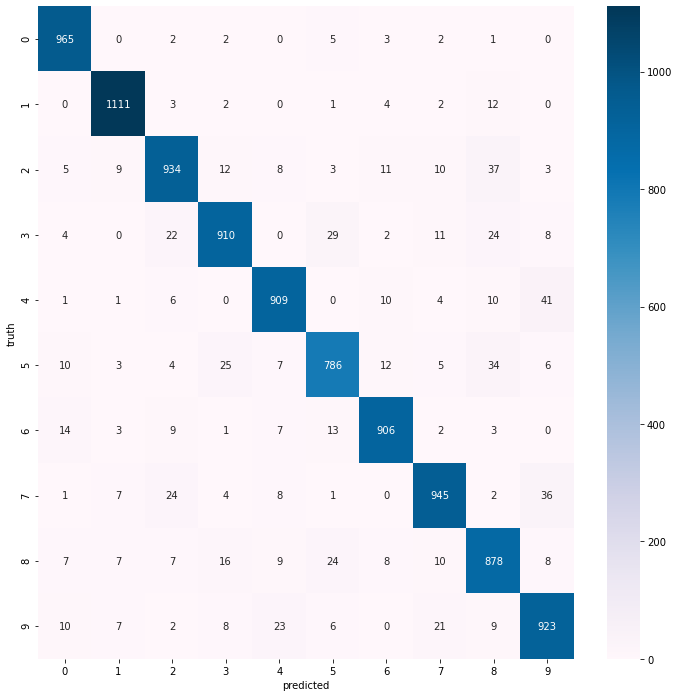

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(cm , annot= True ,fmt= 'd' ,cmap='PuBu')
plt.xlabel('predicted')
plt.ylabel('truth')

In [26]:
# Adding a hidden layer 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')#hidden layer
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(X_train, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4531 - accuracy: 0.8749
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1336 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9843


In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9740


[0.0838991180062294, 0.9739999771118164]